In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import sklearn
import brainiak
import nilearn as nl
from nilearn import image, plotting, input_data

from scipy.spatial import distance

/jukebox/pkgs/PYGER/0.9/envs/pyger/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


In [2]:
from sklearn.linear_model import LogisticRegression

pd.options.display.max_rows = 200

# load dataframes with timing and order information

In [3]:
""" onset and offset TR for each state of each wedding """
timing_df = pd.read_csv('deriv/timing_df_viewing.csv',index_col=0)
timing_df.iloc[:200]

,wed_num,vid_str,onset_TR,len_TRs,offset_TR
0,0,vid1a_q,12,17,29
1,0,vid1b_q,29,6,35
2,0,vid2_q,35,11,46
3,0,vid3_q,49,15,64
4,0,vid4_q,67,16,83
5,0,vid5_q,83,7,90
6,1,vid1a,111,17,128
7,1,vid1b,128,6,134
8,1,vid2,134,11,145
9,1,vid3,145,15,160


In [4]:
order_df = pd.read_csv('deriv/NvSclass_df.csv',index_col=0)
order_df.iloc[:200]

,NorS,wed_id,wed_num,sub_num
0,S,20,0,3
1,N,23,1,3
2,N,6,2,3
3,S,17,3,3
4,S,38,4,3
5,N,22,5,3
6,N,34,6,3
7,S,2,7,3
8,S,29,8,3
9,N,1,9,3


In [5]:
def extract_TRs(wed_num):
  """
  returns a L containing the valid TRs in wed_num
    NB consistent across subjects
  valid TRs are those within a vid
  """
  wed_timing_df = timing_df[timing_df.wed_num == wed_num]
  L = []
  for i,row in wed_timing_df.iterrows():
    vid_TRs = np.arange(row.onset_TR,row.offset_TR)
    L.extend(vid_TRs)
  return L

In [6]:
get_wed_label = lambda sub_num,wed_num:\
  order_df[(
    order_df.sub_num == sub_num) & (
    order_df.wed_num == wed_num
  )].NorS.values[0]


In [7]:
fold_full_L = [
    [0,1],[2,3],[4,5],
    [6,7],[8,9],[10,11]
  ]

In [8]:
def get_fold_info(sub_num,fold_L):
  """ 
  """
  Y_label = []
  X_TRs = []
  ## TEST TRS
  for wed_num in fold_L:
    # X TRs
    wed_TRs = extract_TRs(wed_num)
    X_TRs.extend(wed_TRs)
    # Y labels
    y_wed = np.repeat(get_wed_label(sub_num,wed_num)=='N',len(wed_TRs)).astype(int)
    Y_label.extend(y_wed)
  return X_TRs,Y_label



In [9]:
def load_sub_roi(sub_num,task,roi_name):
  fpath = "sub-%i_task-%s_roi-%s.npy" %(sub_num,task,roi_name)
  return np.load('data/fmri/masked/'+fpath)

In [10]:
get_fold_L_train = lambda fold_num: [j for i in fold_full_L if i!=fold_full_L[fold_num] for j in i]

# xval loop

In [11]:
SUB_NS = np.arange(1,45)

In [12]:
""" 
xval loop 
"""

def xval(roi_name,clf_c):
  yhat_L = []
  for sub_num in SUB_NS:
    print(sub_num)
    try:
      sub_roi = load_sub_roi(sub_num,'videos',roi_name)
    except:
      print('failed to load sub_roi, S=',sub_num,'roi=',roi_name)
      continue
    # fold information
    for fold_num in range(6):
      fold_L_test = fold_full_L[fold_num]
      fold_L_train = get_fold_L_train(fold_num)
      # classifier init
      clf = sklearn.linear_model.LogisticRegression(solver='liblinear',C=clf_c)
      # TRAIN
      X_TRs_train,Y_train = get_fold_info(sub_num,fold_L_train)
      X_train = sub_roi[X_TRs_train,:]
      clf.fit(X_train,Y_train)
      # TEST
      X_TRs_test,Y_test = get_fold_info(sub_num,fold_L_test)
      X_test = sub_roi[X_TRs_test,:]
      yhat_full = clf.predict_proba(X_test)
      # split eval of test TRs into two weddings
      # and plot proba of correct schema
      yhat_first = yhat_full[:int(len(yhat_full)/2),Y_test[0]]
      yhat_second = yhat_full[int(len(yhat_full)/2):,Y_test[-1]]
      yhat_L.append(yhat_first)
      yhat_L.append(yhat_second)
  return np.array(yhat_L)


In [13]:
## compute mean
roi_name = 'rglasser_PM_net'
clf_c = 0.01
yhat = xval(roi_name=roi_name,clf_c=clf_c)
yhat.shape

1
failed to load sub_roi, S= 1 roi= rglasser_PM_net
2
failed to load sub_roi, S= 2 roi= rglasser_PM_net
3
4
5
6
7
8
9
10
11
failed to load sub_roi, S= 11 roi= rglasser_PM_net
12
13
14
15
16
failed to load sub_roi, S= 16 roi= rglasser_PM_net
17
18
19
20
failed to load sub_roi, S= 20 roi= rglasser_PM_net
21
failed to load sub_roi, S= 21 roi= rglasser_PM_net
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
failed to load sub_roi, S= 37 roi= rglasser_PM_net
38
39
failed to load sub_roi, S= 39 roi= rglasser_PM_net
40
41
42
43
44


(432, 72)

In [14]:
M = yhat.mean(0)
S = yhat.std(0) / np.sqrt(len(yhat))

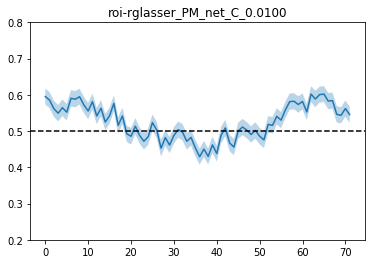

In [15]:
## plt
ax = plt.gca()
ax.plot(M)
ax.fill_between(np.arange(len(M)),M-S,M+S,alpha=.3)
ax.axhline(0.5,c='k',ls='--')
ax.set_ylim(0.2,0.8)
ax.set_title('roi-%s_C_%.4f'%(roi_name,clf_c))
plt.savefig('figures/NvS_logreg_roi-%s_C%.4f.png'%(roi_name,clf_c))